<a href="https://colab.research.google.com/github/Syilun/Kaggle/blob/main/Semi_hw01_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libaries

In [ ]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


from sklearn.impute import KNNImputer


# for modeling 
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to avoid warnings
import warnings
warnings.filterwarnings(action='ignore')


##Mount Your Gdrive to Load Dataset

In [ ]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

# change directory to secom folder in google drive
%cd /content/drive/MyDrive/secom/ 
!pwd # output the current directory
!ls # check


Mounted at /content/drive
/content/drive/MyDrive/secom
/content/drive/MyDrive/secom
uci-secom.csv


##Reading the Data and understanding the attributes

In [ ]:
# reading the data
data = pd.read_csv('../secom/uci-secom.csv')

# getting the shape of the data
# we have 1,567 rows and 592 columns
print(data.shape)


(1567, 592)


In [ ]:
# getting the head of the data
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## Data Visualization/Data Cleaning/Preprocessing

In [ ]:
# deleting the first column
data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 591)

In [ ]:
# checking if the dataset contains any NULL values
# we do have NaN values if we see the output above

data.isnull().any().any()

True

In [ ]:
# Drop columns with more than 25% missing values
missing_value_columns = data.columns[data.isna().mean() >= 0.25]
# print(missing_value_columns)
df = data.drop(missing_value_columns, axis=1)

In [ ]:
# https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/
# https://scikit-learn.org/stable/modules/impute.html#impute


imputer = KNNImputer(missing_values=np.nan)
df = pd.DataFrame(imputer.fit_transform(df))
# again, checking if there is any NULL values left
df.isnull().any().any()

False

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,257.1676,0.66458,7.904,0.12854,3.10880,0.05208,3.06038,19.21168,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,258.0696,0.75868,8.084,0.17064,3.20866,0.06392,3.14666,22.65672,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.0640,0.90320,1.100,0.62190,0.41220,0.25620,0.41190,68.84890,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602,1.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,372.822,72.442,1.8804,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.2280,0.65110,7.320,0.16300,3.56110,0.06700,2.72900,25.03630,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,399.914,79.156,1.0388,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,258.6240,0.72078,9.928,0.19926,3.94380,0.07914,3.84254,27.36838,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432,-1.0


In [ ]:
# len(df.index)

In [ ]:
data.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 559 entries, 0 to 558
dtypes: float64(559)
memory usage: 6.7 MB


In [ ]:
# data.info()
# df.info()

df.rename(columns = {558:'Pass/Fail'}, inplace = True)
df = df.astype({"Pass/Fail": int})
# df.info()

In [ ]:
unique_vals = df['Pass/Fail'].unique()
# print(unique_vals)  # [-1, 1]

In [ ]:
# 遞迴[-1, 1] 用來產生一個先是Pass，後來Fail 的2 elements(df) 的list
targets = [df.loc[data['Pass/Fail'] == val] for val in unique_vals]
print(targets)

[            0        1          2  ...      556       557  Pass/Fail
0     3030.93  2564.00  2187.7333  ...  0.00438   65.5742         -1
1     3095.78  2465.14  2230.4222  ...  0.00600  208.2045         -1
3     2988.72  2479.90  2199.0333  ...  0.00440   73.8432         -1
4     3032.24  2502.87  2233.3667  ...  0.00440   73.8432         -1
5     2946.25  2432.84  2233.3667  ...  0.00520   44.0077         -1
...       ...      ...        ...  ...      ...       ...        ...
1562  2899.41  2464.36  2179.7333  ...  0.00470  203.1720         -1
1563  3052.31  2522.55  2198.5667  ...  0.00470  203.1720         -1
1564  2978.81  2379.78  2206.3000  ...  0.00250   43.5231         -1
1565  2894.92  2532.01  2177.0333  ...  0.00750   93.4941         -1
1566  2944.92  2450.76  2195.4444  ...  0.00450  137.7844         -1

[1463 rows x 559 columns],             0        1          2  ...     556       557  Pass/Fail
2     2932.61  2559.94  2186.4111  ...  0.0148   82.8602          1
10    2

In [ ]:
# print(targets[0][1])

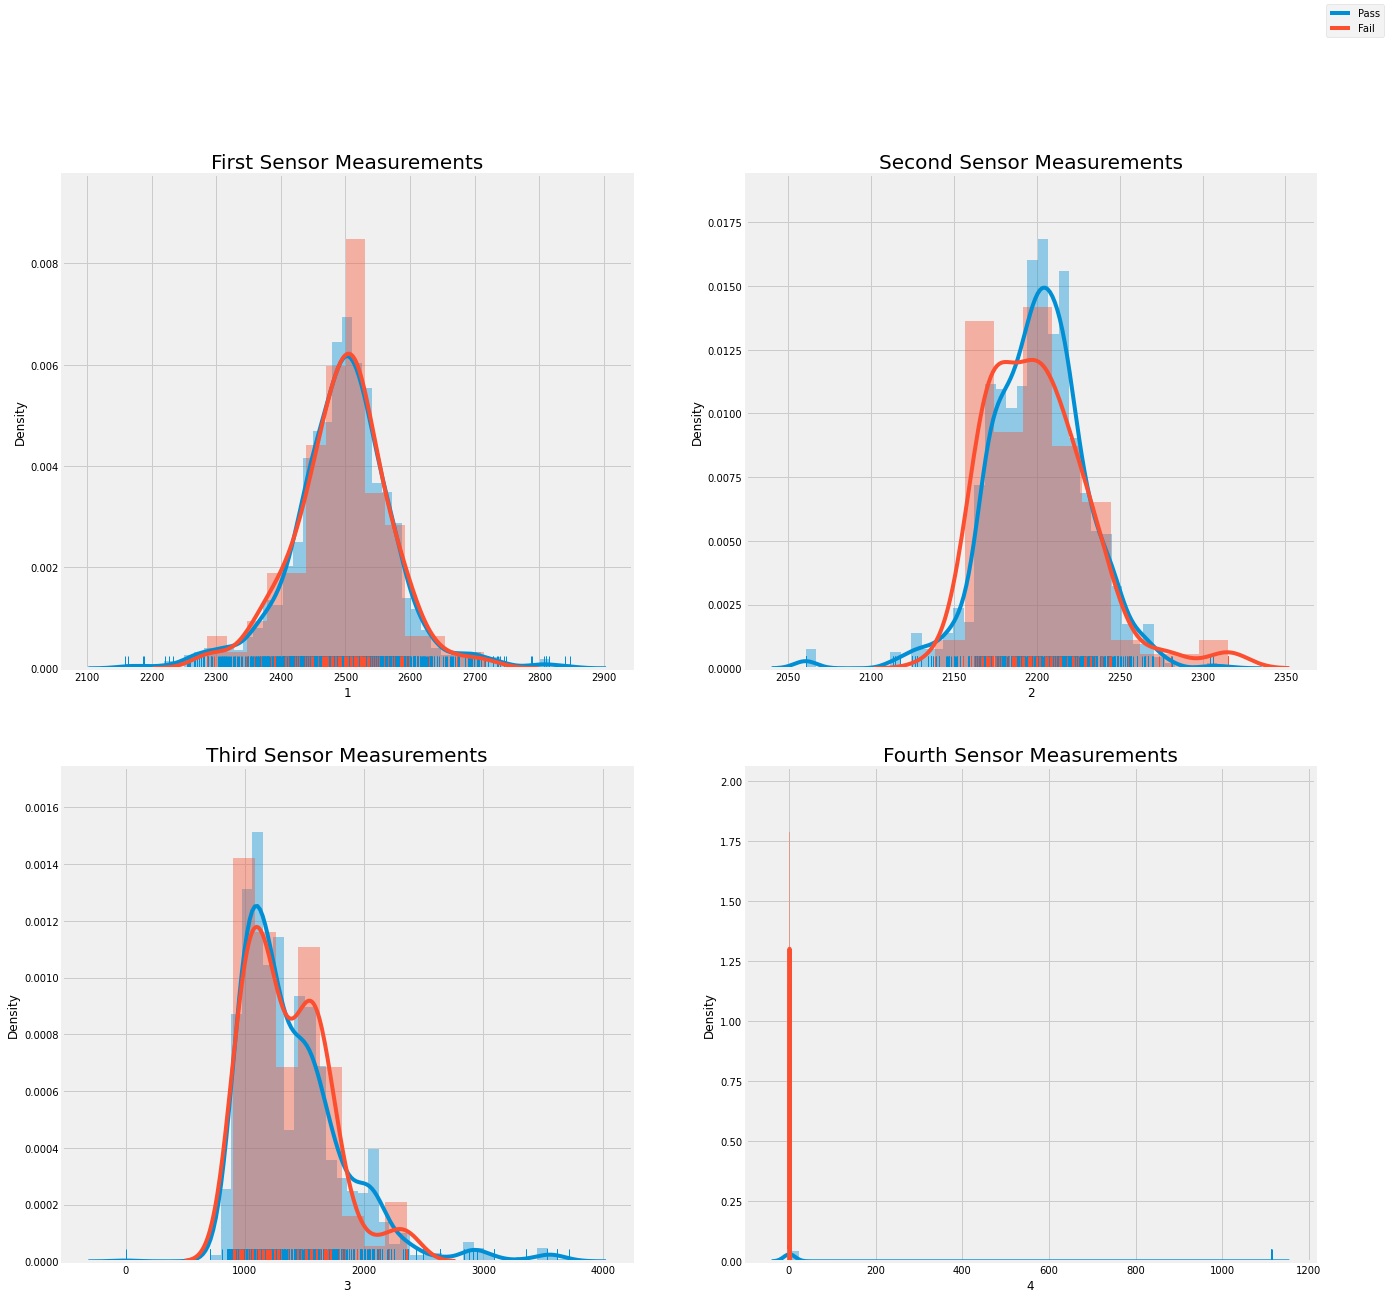

In [39]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target[1], hist=True, rug=True)
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target[2], hist=True, rug=True)
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target[3], hist=True, rug=True)
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target[4], hist=True, rug=True)
plt.title('Fourth Sensor Measurements', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()


Text(0.5, 1.0, 'Correlation heatmap for the Data')

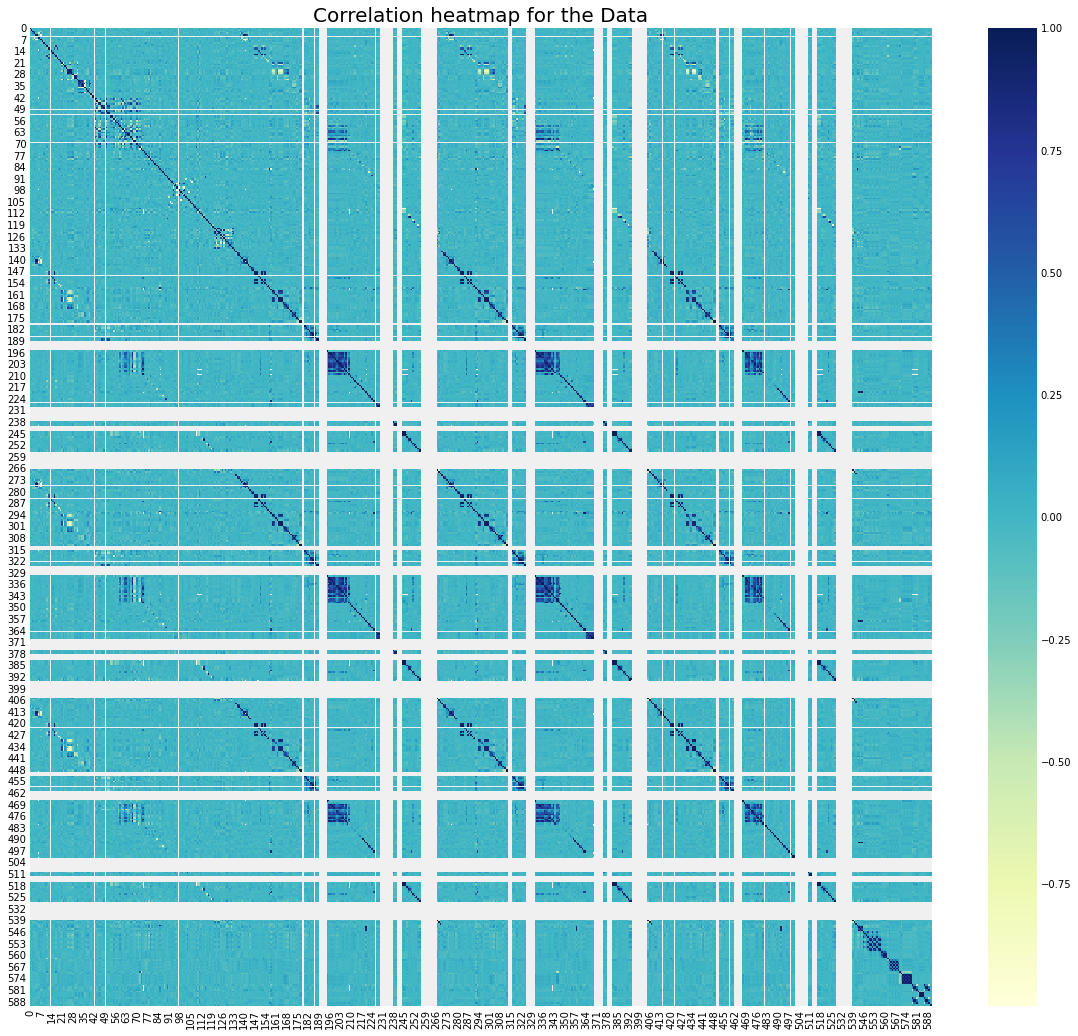

In [ ]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [ ]:
#Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [ ]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
df = remove_collinear_features(df,0.70)

17 | 11 | 0.79
22 | 21 | 0.73
26 | 25 | 0.82
27 | 25 | 0.98
27 | 26 | 0.79
30 | 29 | 0.86
34 | 32 | 0.75
35 | 34 | 0.77
36 | 32 | 0.75
36 | 34 | 1.0
36 | 35 | 0.77
39 | 34 | 0.8
39 | 36 | 0.8
46 | 45 | 0.81
50 | 46 | 0.9
51 | 47 | 0.71
54 | 53 | 0.94
60 | 43 | 0.9
60 | 50 | 0.7
65 | 64 | 0.84
66 | 46 | 0.82
66 | 50 | 0.76
70 | 46 | 0.79
70 | 50 | 0.77
70 | 62 | 0.73
70 | 66 | 0.9
93 | 91 | 0.96
95 | 91 | 0.84
95 | 93 | 0.87
98 | 91 | 0.73
98 | 93 | 0.79
98 | 95 | 0.91
101 | 96 | 0.99
102 | 89 | 0.99
103 | 90 | 0.99
116 | 114 | 0.94
117 | 114 | 0.89
117 | 116 | 0.86
118 | 115 | 0.71
120 | 115 | 0.96
123 | 115 | 0.83
123 | 120 | 0.79
133 | 4 | 1.0
140 | 16 | 0.89
141 | 16 | 0.97
141 | 140 | 0.89
145 | 16 | 0.98
145 | 140 | 0.9
145 | 141 | 0.99
147 | 16 | 0.87
147 | 140 | 0.8
147 | 141 | 0.94
147 | 145 | 0.89
148 | 19 | 0.81
154 | 26 | 0.71
154 | 150 | 0.76
155 | 26 | 0.77
155 | 150 | 0.8
155 | 154 | 0.92
156 | 26 | 0.74
156 | 150 | 0.79
156 | 154 | 0.9
156 | 155 | 0.96
165 | 163 | 1.0
17

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,23,24,25,28,29,31,32,33,37,38,40,41,42,43,44,45,47,48,49,...,486,487,488,489,490,491,493,500,501,502,503,504,505,506,507,508,509,510,514,515,516,518,519,520,522,530,531,534,535,536,537,542,543,544,550,551,554,555,557,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,192.3963,12.5190,1.4026,-5419.00,-4043.75,751.00,0.8955,64.2333,2.0222,3.5191,83.3971,9.5126,66.3141,86.9555,61.29,4.515,70.0,352.7173,10.1841,130.3691,1.3072,141.2282,1.0,...,64.6707,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,1.0616,395.570,75.752,12.93,1.0344,0.4385,257.1676,0.66458,7.904,0.12854,533.8500,2.1113,8.95,0.5005,0.0118,0.01942,0.01266,65.5742,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,191.2872,12.4608,1.3825,-5441.50,-3498.75,-1640.25,1.2973,68.4222,2.2667,3.4171,84.9052,9.7997,64.9193,87.5241,78.25,2.773,70.0,352.2445,10.0373,133.1727,1.2887,145.8445,1.0,...,141.4365,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,1.3526,408.798,74.640,16.00,0.9634,0.1745,258.0696,0.75868,8.084,0.17064,535.0164,2.4335,5.92,0.5019,0.0223,0.00960,0.02010,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,192.7035,12.5404,1.4123,-5447.75,-4047.00,-1916.50,1.3122,67.1333,2.3333,3.5986,84.7569,8.6590,65.8389,84.7327,14.37,5.434,70.0,364.3782,9.8783,131.8027,1.2992,141.0845,1.0,...,240.7767,244.2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,0.7942,411.136,74.654,16.16,1.5021,0.3718,267.0640,0.90320,1.100,0.62190,535.0245,2.0293,11.21,0.4958,0.0157,0.05840,0.04840,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,192.1557,12.4782,1.4011,-5468.25,-4515.00,-1657.25,1.3137,62.9333,2.6444,3.3813,84.9105,8.6789,65.1951,86.6867,76.90,1.279,70.0,363.0273,9.9305,131.8027,1.3027,142.5427,1.0,...,113.5593,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,1.1650,372.822,72.442,131.68,1.1613,0.7288,268.2280,0.65110,7.320,0.16300,530.5682,2.0253,9.33,0.4990,0.0103,0.02020,0.01490,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,191.6037,12.4735,1.3888,-5476.25,-3987.50,117.00,1.2887,62.8333,3.1556,3.2728,86.3269,8.7677,66.1542,86.1468,76.39,2.209,70.0,353.3400,10.4091,176.3136,1.0341,138.0882,1.0,...,148.0663,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1096,0.0078,0.0026,1.4636,399.914,79.156,19.63,0.9778,0.2156,258.6240,0.72078,9.928,0.19926,532.0155,2.0275,8.83,0.4800,0.4766,0.02020,0.01490,73.8432,-1


In [ ]:
# Split df into X and y
y = df['Pass/Fail']
X = df.drop('Pass/Fail', axis=1)

In [ ]:
# $ Check 有116個sensors 值維持不變
(pd.Series({column: len(X[column].unique()) for column in X.columns}) == 1).sum()

116

In [ ]:
temp = (pd.Series({column: len(X[column].unique()) for column in X.columns}) == 1)
single_value_columns = temp[temp].index
single_value_columns = list(single_value_columns)
df.drop(single_value_columns, axis=1, inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,18,19,20,21,23,24,25,28,29,31,32,33,37,38,40,41,43,44,45,47,48,53,55,56,57,...,415,437,445,449,453,459,460,461,462,463,464,465,466,475,476,486,487,493,514,515,516,518,519,520,522,530,531,534,535,536,537,542,543,544,550,551,554,555,557,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,192.3963,12.5190,1.4026,-5419.00,-4043.75,751.00,0.8955,64.2333,2.0222,3.5191,83.3971,9.5126,66.3141,86.9555,61.29,4.515,352.7173,10.1841,130.3691,1.3072,141.2282,4.592,2834.0,0.9317,0.9484,...,44.5055,29.9394,311.6377,63.7987,31.9893,613.3069,291.4842,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,0.0000,0.0000,64.6707,0.0000,0.0,0.1096,0.0078,0.0026,1.0616,395.570,75.752,12.93,1.0344,0.4385,257.1676,0.66458,7.904,0.12854,533.8500,2.1113,8.95,0.5005,0.0118,0.01942,0.01266,65.5742,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,191.2872,12.4608,1.3825,-5441.50,-3498.75,-1640.25,1.2973,68.4222,2.2667,3.4171,84.9052,9.7997,64.9193,87.5241,78.25,2.773,352.2445,10.0373,133.1727,1.2887,145.8445,4.590,2853.0,0.9324,0.9479,...,48.5294,40.4475,463.2883,73.5536,30.8643,0.0000,246.7762,0.0000,359.0444,130.6350,820.7900,194.4371,0.0000,0.0000,0.0000,141.4365,0.0000,0.0,0.1096,0.0078,0.0026,1.3526,408.798,74.640,16.00,0.9634,0.1745,258.0696,0.75868,8.084,0.17064,535.0164,2.4335,5.92,0.5019,0.0223,0.00960,0.02010,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,192.7035,12.5404,1.4123,-5447.75,-4047.00,-1916.50,1.3122,67.1333,2.3333,3.5986,84.7569,8.6590,65.8389,84.7327,14.37,5.434,364.3782,9.8783,131.8027,1.2992,141.0845,4.486,2936.0,0.9139,0.9447,...,60.0000,32.3594,21.3645,148.0287,13.3923,434.2674,151.7665,0.0000,190.3869,746.9150,74.0741,191.7582,250.1742,0.0000,0.0000,240.7767,244.2748,0.0,0.1096,0.0078,0.0026,0.7942,411.136,74.654,16.16,1.5021,0.3718,267.0640,0.90320,1.100,0.62190,535.0245,2.0293,11.21,0.4958,0.0157,0.05840,0.04840,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,192.1557,12.4782,1.4011,-5468.25,-4515.00,-1657.25,1.3137,62.9333,2.6444,3.3813,84.9105,8.6789,65.1951,86.6867,76.90,1.279,363.0273,9.9305,131.8027,1.3027,142.5427,4.486,2936.0,0.9139,0.9447,...,34.0336,27.6824,24.2831,100.0021,35.4323,225.0169,100.4883,305.7500,88.5553,104.6660,71.7583,0.0000,336.7660,0.0000,711.6418,113.5593,0.0000,0.0,0.1096,0.0078,0.0026,1.1650,372.822,72.442,131.68,1.1613,0.7288,268.2280,0.65110,7.320,0.16300,530.5682,2.0253,9.33,0.4990,0.0103,0.02020,0.01490,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,191.6037,12.4735,1.3888,-5476.25,-3987.50,117.00,1.2887,62.8333,3.1556,3.2728,86.3269,8.7677,66.1542,86.1468,76.39,2.209,353.3400,10.4091,176.3136,1.0341,138.0882,4.624,2865.0,0.9298,0.9449,...,25.3521,30.8924,44.8980,89.9529,42.6838,171.4486,276.8810,461.8619,240.1781,0.0000,587.3773,748.1781,0.0000,293.1396,0.0000,148.0663,0.0000,0.0,0.1096,0.0078,0.0026,1.4636,399.914,79.156,19.63,0.9778,0.2156,258.6240,0.72078,9.928,0.19926,532.0155,2.0275,8.83,0.4800,0.4766,0.02020,0.01490,73.8432,-1


In [ ]:
# Split df into X and y
y = df['Pass/Fail']
X = df.drop('Pass/Fail', axis=1)

In [ ]:
# pie chart
# We have highly imbalanced class with only 6.6% failures and 93.4% pass

# labels = ['Pass', 'Fail']
# size = df['Pass/Fail'].value_counts()
# colors = ['orange', 'red']
# explode = [0, 0.1]

# plt.style.use('seaborn-deep')
# plt.rcParams['figure.figsize'] = (8, 8)
# plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
# plt.axis('off')
# plt.title('Target: Pass or Fail', fontsize = 20)
# plt.legend()
# plt.show()



# df['Pass/Fail'].value_counts().plot(kind="bar")

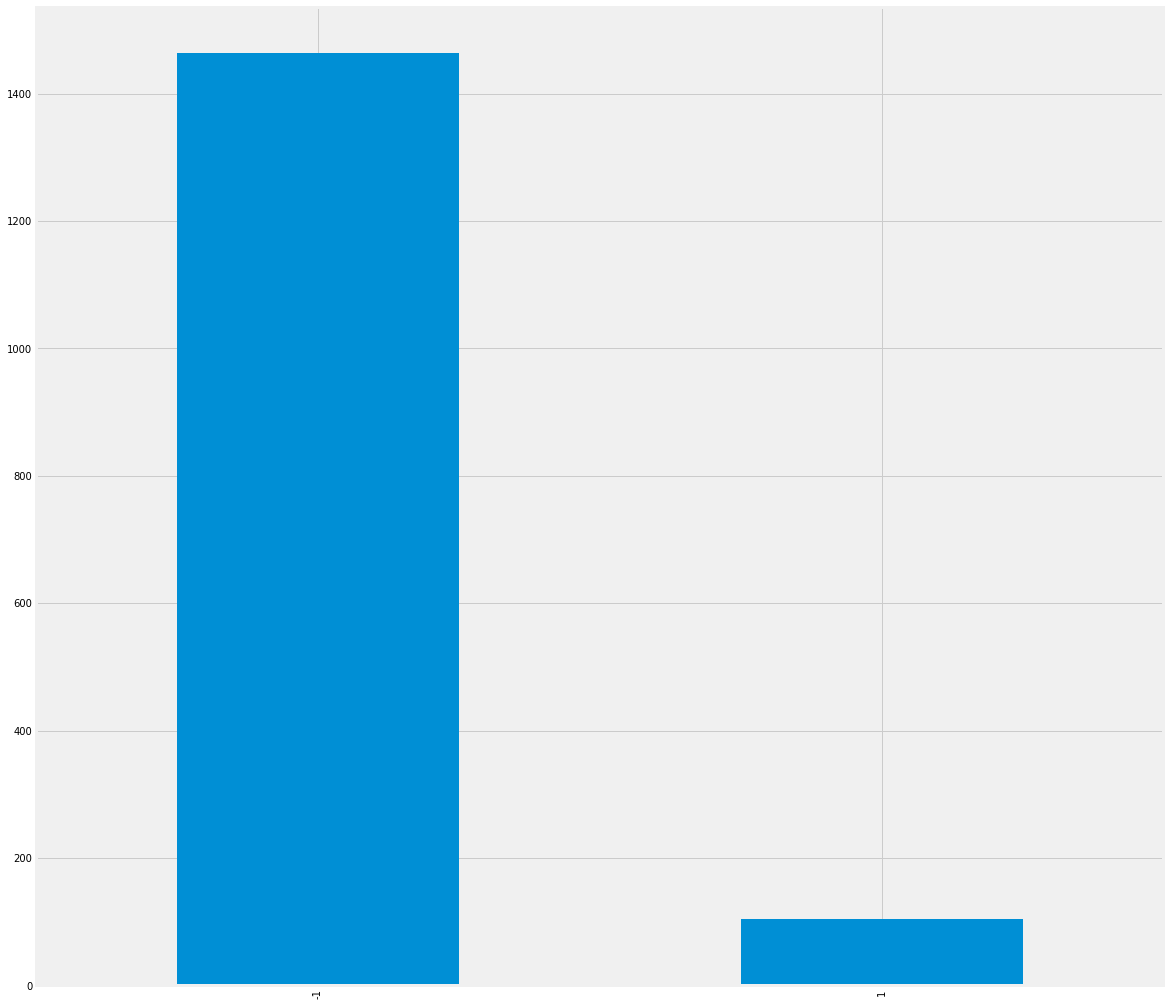

In [ ]:
import plotly.express as px
fig = px.pie(
    y.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

df['Pass/Fail'].value_counts().plot(kind="bar")

In [ ]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
X_train

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,18,19,20,21,23,24,25,28,29,31,32,33,37,38,40,41,43,44,45,47,48,53,55,56,57,...,410,415,437,445,449,453,459,460,461,462,463,464,465,466,475,476,486,487,493,514,515,516,518,519,520,522,530,531,534,535,536,537,542,543,544,550,551,554,555,557
390,2989.82,2434.00,2180.0556,1031.0669,0.7565,104.7056,0.1226,1.5865,0.0080,-0.0216,0.9751,201.8822,7.9191,416.1765,9.5523,192.3299,12.4480,1.4121,-6894.25,-3044.00,1432.7500,0.9823,69.3111,2.7111,4.6913,85.5983,8.5232,66.2289,86.6814,78.95,2.607,351.5336,9.7572,142.1773,1.0127,131.0882,4.598,2824.0,0.9338,0.9440,...,18.9845,36.8852,19.4483,0.0000,132.7461,15.3042,900.6318,80.8390,0.0000,0.0000,0.0000,66.2398,566.6199,408.2340,577.2652,0.0000,48.0000,533.3333,0.0,0.1096,0.0078,0.0026,0.60040,408.8920,74.5780,17.130,0.9769,0.1122,251.496,0.60070,7.590,0.07780,534.0609,2.4197,8.36,0.4952,0.0136,0.0104,0.0083,79.8045
635,3017.53,2524.09,2201.0667,880.2317,1.4148,106.5478,0.1211,1.3720,-0.0005,0.0052,0.9675,198.0364,10.1995,415.3266,8.9253,189.1111,12.4871,1.3902,-5438.50,-4643.50,-642.5000,1.2805,67.4778,2.4667,3.4024,85.7419,8.5788,66.2428,86.6582,78.00,3.483,363.4464,9.4867,136.4373,1.3118,137.8873,4.622,2846.0,0.9258,0.9487,...,342.7237,60.8108,29.3387,252.0636,102.5424,61.6097,0.0000,88.2312,0.0000,476.8831,713.3524,117.5251,0.0000,0.0000,0.0000,0.0000,58.4927,283.6364,0.0,0.1096,0.0078,0.0026,1.33190,404.4960,81.9900,18.410,0.9674,0.7942,259.484,0.69372,7.154,0.13118,534.1891,2.0627,7.72,0.4998,0.0097,0.0328,0.0235,71.5333
78,3032.89,2500.81,2183.4333,1582.5646,1.3601,99.0267,0.1240,1.4615,-0.0034,-0.0042,0.9581,199.5653,9.0188,405.2932,10.0926,189.4727,12.4743,1.3953,-6656.75,-3931.25,-116.2500,0.8933,60.9222,2.0111,3.4918,84.6216,9.1585,66.3740,86.2790,74.54,2.215,354.2691,9.9035,156.3145,1.0420,133.3182,4.607,2875.0,0.9340,0.9541,...,907.5269,54.6961,16.6625,47.5705,77.8363,18.3156,618.8582,136.8020,45.8894,103.1782,219.0263,86.8699,752.4324,97.6623,0.0000,0.0000,54.8463,0.0000,0.0,0.1096,0.0078,0.0026,1.76050,406.4040,79.9700,14.050,0.9546,0.7055,263.494,0.71350,8.060,0.10890,537.6418,2.2678,10.22,0.4961,0.0124,0.0155,0.0177,114.4127
733,3037.92,2361.50,2210.9778,1572.4698,1.0204,106.2089,0.1222,1.5251,0.0468,-0.0010,0.9753,197.6786,10.4507,414.6213,9.1843,188.4943,12.4755,1.4187,-6338.25,-4332.50,1469.7500,0.9815,66.2889,2.5111,4.6950,85.8807,9.7540,66.5687,87.1954,65.11,3.462,353.5900,10.0694,131.4718,1.3262,142.0336,4.623,2845.0,0.9342,0.9547,...,10.7501,23.8938,24.4747,194.6002,136.4005,41.2894,751.0979,60.5472,510.7011,392.4016,0.0000,109.1045,295.9641,460.2151,0.0000,650.0000,44.1454,0.0000,0.0,0.1096,0.0078,0.0026,1.23684,406.4764,79.3328,15.464,0.9672,0.3629,253.652,0.79310,12.920,0.12320,534.5745,1.9791,9.70,0.4965,0.0186,0.0335,0.0084,25.1494
1262,2982.67,2541.55,2173.4889,1145.7970,0.9402,104.0556,0.1247,1.3762,-0.0206,-0.0104,0.9792,197.9422,9.0685,397.0925,9.5181,188.4241,12.5718,1.4124,-5294.50,-5356.75,-6954.7500,1.3228,73.9000,2.1556,3.5428,85.3182,8.5298,65.9458,86.9760,15.69,5.586,364.5245,10.2533,130.8427,1.4298,149.1964,4.622,2874.0,0.9222,0.9496,...,177.9503,55.6701,29.3356,470.1742,88.3515,15.1304,508.4112,165.0213,79.4028,168.7151,101.9732,0.0000,497.7376,0.0000,437.6554,0.0000,29.6774,567.0886,0.0,0.1138,0.0102,0.0025,0.82730,400.8140,73.2540,14.530,0.9647,0.3064,264.272,0.56710,4.980,0.08770,524.4955,1.0912,11.12,0.4949,0.0146,0.0137,0.0326,237.4625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3070.07,2459.22,2216.5111,871.2526,1.2366,107.4867,0.1194,1.4125,-0.0199,0.0024,0.9776,199.9365,12.2715,417.7363,9.0234,190.9131,12.4773,1.4004,-5201.50,-2782.25,4203.3333,1.3472,74.1333,1.7556,3.4008,86.3826,8.3273,66.0203,87.0370,80.01,3.070,357.2082,1

In [ ]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


##Training a Model

In [ ]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])
    clr = classification_report(y_test, y_pred, labels=[-1, 1])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.yticks(ticks=[0.5, 1.5], labels=["PASS", "FAIL"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

##Logistic Regression (Normal Data)

In [ ]:
import plotly.express as px
fig = px.pie(
    y_train.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

y_train.value_counts()

-1    1024
 1      72
Name: Pass/Fail, dtype: int64

Accuracy: 88.32%


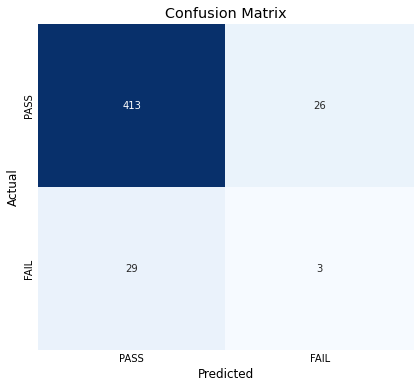

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.93      0.94      0.94       439
           1       0.10      0.09      0.10        32

    accuracy                           0.88       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.88      0.88      0.88       471



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

evaluate_model(model, X_test, y_test)

##Logistic Regression (UnderSampling Data)

In [ ]:
undersampler = RandomUnderSampler(random_state=1)
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

In [ ]:
y_train_us.value_counts()

 1    72
-1    72
Name: Pass/Fail, dtype: int64

In [ ]:
fig = px.pie(
    y_train_us.value_counts(),
    values='Pass/Fail',
    names=["PASS", "FAIL"],
    title="Class Distribution",
    width=500
)

fig.show()

Accuracy: 63.48%


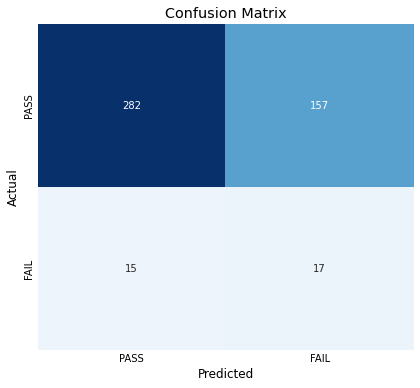

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.95      0.64      0.77       439
           1       0.10      0.53      0.17        32

    accuracy                           0.63       471
   macro avg       0.52      0.59      0.47       471
weighted avg       0.89      0.63      0.73       471



In [ ]:
model = LogisticRegression()
model.fit(X_train_us, y_train_us)

evaluate_model(model, X_test, y_test)

##Over-Sampling with SMOTE

In [ ]:
oversampler = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

 1    1024
-1    1024
Name: Pass/Fail, dtype: int64

Accuracy: 83.65%


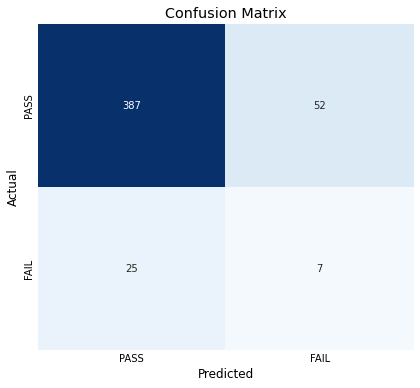

Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.94      0.88      0.91       439
           1       0.12      0.22      0.15        32

    accuracy                           0.84       471
   macro avg       0.53      0.55      0.53       471
weighted avg       0.88      0.84      0.86       471



In [ ]:
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

evaluate_model(model, X_test, y_test)